## Librerias

In [40]:
import pandas as pd
import numpy as np # Su principal función es proporcionar estructuras de datos eficientes, especialmente matrices multidimensionales (arrays)

## Missings

### Creación del conjunto de Datos

In [41]:
num_registros = 10000 

In [42]:
#Recordar que esto no es pandas 
datos_continuos = np.random.rand(num_registros, 5)  # 5 para especificar cuantas columnas. Acá crea datos continuos.
#Es decir, pone 10,000 numeros randoms, repartidos en 5 columnas


In [43]:
discretos = ['col_A','col_B','col_C','col_D','col_E'] #Acá crea los discretos
datos_discretos = np.random.choice(discretos, size = (num_registros, 5))  #Choice coloca registros de forma aleatoria a partir de la lista que le pases

##### Ahora sí creamos nuestro Data Frame con Pandas

In [44]:
#acá no explicó bien qué hizo 
df = pd.DataFrame(datos_continuos, columns = [f'Continua_{i+1}' for i in range(5)])  #este combo de f creo se llama fstring, columns es para nombrarlas columnas
df

,Continua_1,Continua_2,Continua_3,Continua_4,Continua_5
0,0.775351,0.601312,0.696428,0.481936,0.974293
1,0.483453,0.968316,0.714703,0.139930,0.048719
2,0.860112,0.764891,0.994033,0.539445,0.090201
3,0.337770,0.329701,0.758832,0.543987,0.486430
4,0.224232,0.360616,0.505673,0.853464,0.883142
...,...,...,...,...,...
9995,0.098621,0.676660,0.820030,0.209173,0.509854
9996,0.491042,0.421315,0.566735,0.541974,0.896921
9997,0.807406,0.784217,0.460938,0.376140,0.937784
9998,0.672348,0.521136,0.079612,0.279766,0.272760


In [45]:
for i in range(5):
    df[f'Discreta_{i+1}'] = datos_discretos[:,i] # acá agrega 5 columnas discretas (el for es para no hacer 5 veces manual)

In [46]:
df

,Continua_1,Continua_2,Continua_3,Continua_4,Continua_5,Discreta_1,Discreta_2,Discreta_3,Discreta_4,Discreta_5
0,0.775351,0.601312,0.696428,0.481936,0.974293,col_C,col_C,col_A,col_B,col_C
1,0.483453,0.968316,0.714703,0.139930,0.048719,col_B,col_E,col_E,col_A,col_A
2,0.860112,0.764891,0.994033,0.539445,0.090201,col_A,col_A,col_E,col_E,col_E
3,0.337770,0.329701,0.758832,0.543987,0.486430,col_B,col_A,col_C,col_E,col_D
4,0.224232,0.360616,0.505673,0.853464,0.883142,col_A,col_A,col_B,col_D,col_D
...,...,...,...,...,...,...,...,...,...,...
9995,0.098621,0.676660,0.820030,0.209173,0.509854,col_E,col_B,col_D,col_D,col_D
9996,0.491042,0.421315,0.566735,0.541974,0.896921,col_E,col_C,col_A,col_A,col_B
9997,0.807406,0.784217,0.460938,0.376140,0.937784,col_D,col_A,col_A,col_B,col_C
9998,0.672348,0.521136,0.079612,0.279766,0.272760,col_E,col_D,col_B,col_D,col_C


### Introducimos valores nulos de forma aleatoria para DF

In [47]:
#Definimos el % de nulos que vamos a meter
porcentaje_nulos = 0.2 #20% de nulos

In [48]:
#primero definimos la cantidad
total_nulos_continuos = int(np.floor(porcentaje_nulos * num_registros*5)) #5 por las columnas
total_nulos_discretos = int(np.floor(porcentaje_nulos * num_registros*5)) 

#### Literal es crear los valores aleatorios para las columnas continuas

In [49]:
# Ahora empezamos con los valores nulos continuos

indice_filas_cont = np.random.randint(0, df.shape[0], total_nulos_continuos ) # function in NumPy used to generate random integers from a "discrete uniform" distribution within a specified range.
# numpy.random.randint(low, high=None, size=None, dtype='l') # shape es el max de columnas
indice_columnas_cont = np.random.randint(0, int(df.shape[1]/2), total_nulos_continuos ) #este va de col 1 a 5

In [50]:
#Para Discretas
indice_filas_dist = np.random.randint(0, df.shape[0], total_nulos_discretos )
indice_columnas_dist = np.random.randint(int(df.shape[1]/2), df.shape[1], total_nulos_discretos ) #este debe de ir del 6 al 10

In [51]:
df.shape[0] #Esta fn es para ver el primer y ultimo indice o algo así

10000

In [52]:
total_nulos_continuos

10000

In [53]:
# Introducimos valores NaN para columnas continuas
# Esta funcion (iat) es parecida al randint. Le vamos a pasar el indice 
for i in range(total_nulos_continuos):
    df.iat[indice_filas_cont[i], indice_columnas_cont[i]] = np.nan

#Con esto ya agrego los nulos en las continuas

In [54]:
#Para contar los nulos
df.isnull().sum()

Continua_1    1802
Continua_2    1836
Continua_3    1830
Continua_4    1811
Continua_5    1793
Discreta_1       0
Discreta_2       0
Discreta_3       0
Discreta_4       0
Discreta_5       0
dtype: int64

In [55]:
#Ahora lo mismo para las discretas
for i in range(total_nulos_discretos):
    df.iat[indice_filas_dist[i], indice_columnas_dist[i]] = np.nan


In [56]:
#Para contar los nulos
df.isnull().sum()#.sort_values(ascending = False) / df.shape[0]

Continua_1    1802
Continua_2    1836
Continua_3    1830
Continua_4    1811
Continua_5    1793
Discreta_1    1834
Discreta_2    1872
Discreta_3    1804
Discreta_4    1765
Discreta_5    1786
dtype: int64

## Imputación de valores nulos con diferentes técnicas 

In [57]:
from sklearn.impute import SimpleImputer #Solo se pueden imputar continuos

In [58]:
imputador_media = SimpleImputer(strategy='mean') #Vamos a imputar con la media

In [59]:
#este es el array de imputaciones
imputador_media.fit_transform(df[list(df.columns[0:5])]) #el fit transform es para

array([[0.77535059, 0.5024631 , 0.6964283 , 0.48193562, 0.97429286],
       [0.50354916, 0.96831572, 0.71470335, 0.13993034, 0.04871882],
       [0.86011154, 0.76489107, 0.99403258, 0.53944489, 0.09020133],
       ...,
       [0.80740623, 0.78421696, 0.46093757, 0.49151392, 0.93778417],
       [0.50354916, 0.52113574, 0.07961198, 0.27976559, 0.27276009],
       [0.34456629, 0.37860646, 0.49962667, 0.08811909, 0.50240499]],
      shape=(10000, 5))

In [60]:
#Acá tal cual es meter los valores que ya vienen imputados
df[list(df.columns[:5])] = imputador_media.fit_transform(df[list(df.columns[0:5])]) 

In [61]:
df.isnull().sum()

Continua_1       0
Continua_2       0
Continua_3       0
Continua_4       0
Continua_5       0
Discreta_1    1834
Discreta_2    1872
Discreta_3    1804
Discreta_4    1765
Discreta_5    1786
dtype: int64

In [62]:
imputador_moda = SimpleImputer(strategy='most_frequent') #Vamos a imputar con la media
df[list(df.columns[5:])] = imputador_moda.fit_transform(df[list(df.columns[5:])]) # acpa el columns[5:] es lo que determina cuales imputamos

In [63]:
df.isnull().sum()

Continua_1    0
Continua_2    0
Continua_3    0
Continua_4    0
Continua_5    0
Discreta_1    0
Discreta_2    0
Discreta_3    0
Discreta_4    0
Discreta_5    0
dtype: int64

In [64]:
df

,Continua_1,Continua_2,Continua_3,Continua_4,Continua_5,Discreta_1,Discreta_2,Discreta_3,Discreta_4,Discreta_5
0,0.775351,0.502463,0.696428,0.481936,0.974293,col_C,col_C,col_E,col_B,col_C
1,0.503549,0.968316,0.714703,0.139930,0.048719,col_B,col_E,col_E,col_A,col_A
2,0.860112,0.764891,0.994033,0.539445,0.090201,col_A,col_A,col_E,col_E,col_E
3,0.337770,0.329701,0.758832,0.491514,0.486430,col_D,col_A,col_C,col_E,col_D
4,0.224232,0.502463,0.505673,0.853464,0.502405,col_A,col_A,col_E,col_D,col_D
...,...,...,...,...,...,...,...,...,...,...
9995,0.098621,0.676660,0.820030,0.209173,0.509854,col_E,col_A,col_D,col_B,col_D
9996,0.491042,0.421315,0.566735,0.541974,0.896921,col_E,col_C,col_A,col_A,col_B
9997,0.807406,0.784217,0.460938,0.491514,0.937784,col_D,col_A,col_A,col_B,col_C
9998,0.503549,0.521136,0.079612,0.279766,0.272760,col_E,col_D,col_B,col_D,col_C


## Outliers | Valores extremos

### Univariado

In [65]:
## Outliers
varc = df.columns[0:5] #variables continuas - Se trae lso nombres nomás
varc

Index(['Continua_1', 'Continua_2', 'Continua_3', 'Continua_4', 'Continua_5'], dtype='object')

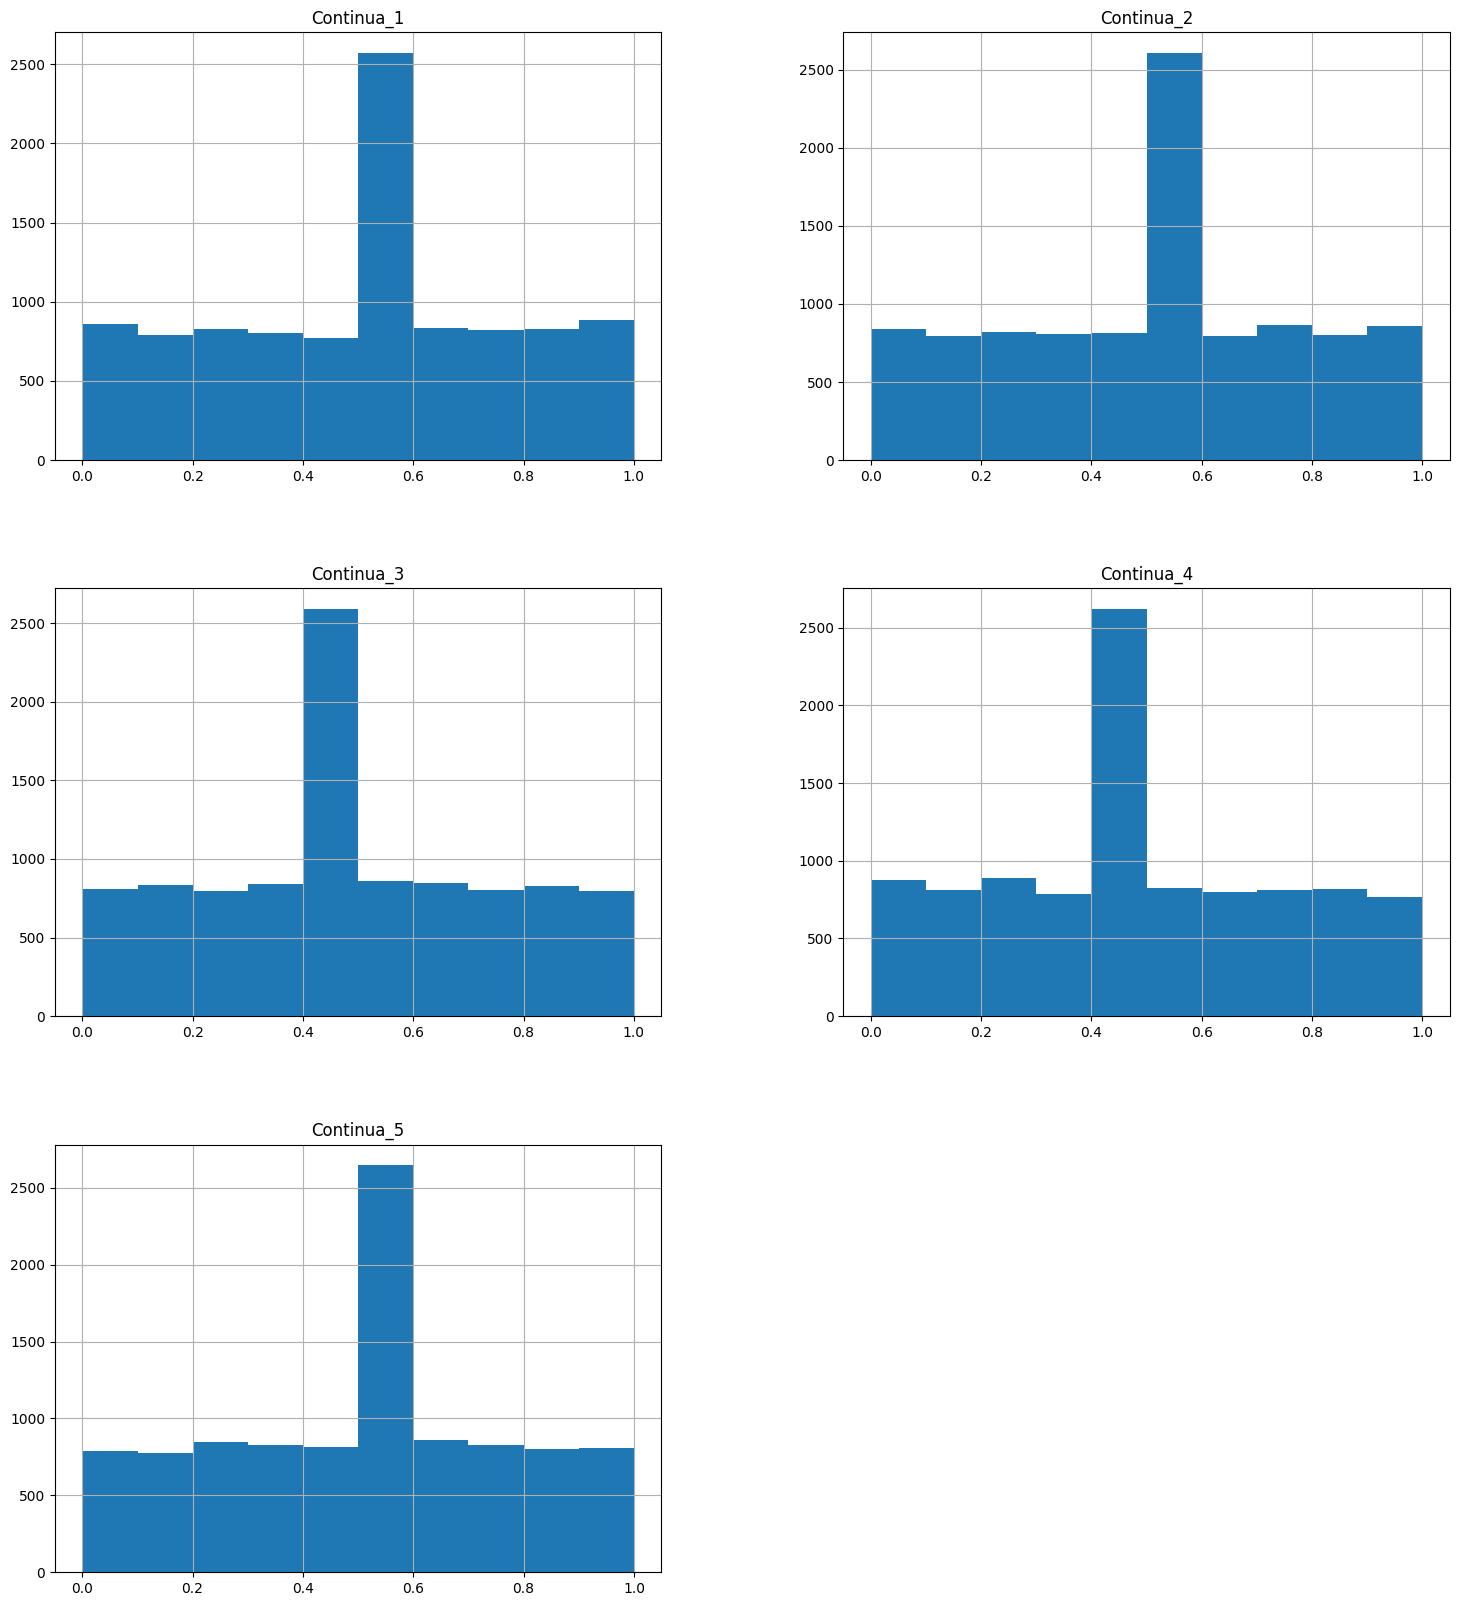

In [86]:
df[varc].hist( figsize=(18,20)); # acá se ahorra codigo y en una linea saca los 5 histogramas
#se ve así raro porque son histogramas no?


#### Acá el profe generó una dn normal a la que le va a agregar valores extremos

In [71]:
np.random.seed(0)

data = np.random.normal(loc=0, scale =1, size=(num_registros, int(df.shape[1]/2)))  #el shape es la forma fancy de agarrar la mitad

for i in range(data.shape[1]):
    #Acá agregamos valores extremos positivos
    data[np.random.choice(range(num_registros), size=10, replace=False), i] += np.random.uniform(10,20, size=10)
    # Agregando valores extremos negativo
    data[np.random.choice(range(num_registros), size=10, replace=False), i] -= np.random.uniform(10,20, size=10)
    
df2 = pd.DataFrame(data, columns=[f'Continua_{i+1}' for i in range(5)])

array([[<Axes: title={'center': 'Continua_1'}>,
        <Axes: title={'center': 'Continua_2'}>],
       [<Axes: title={'center': 'Continua_3'}>,
        <Axes: title={'center': 'Continua_4'}>],
       [<Axes: title={'center': 'Continua_5'}>, <Axes: >]], dtype=object)

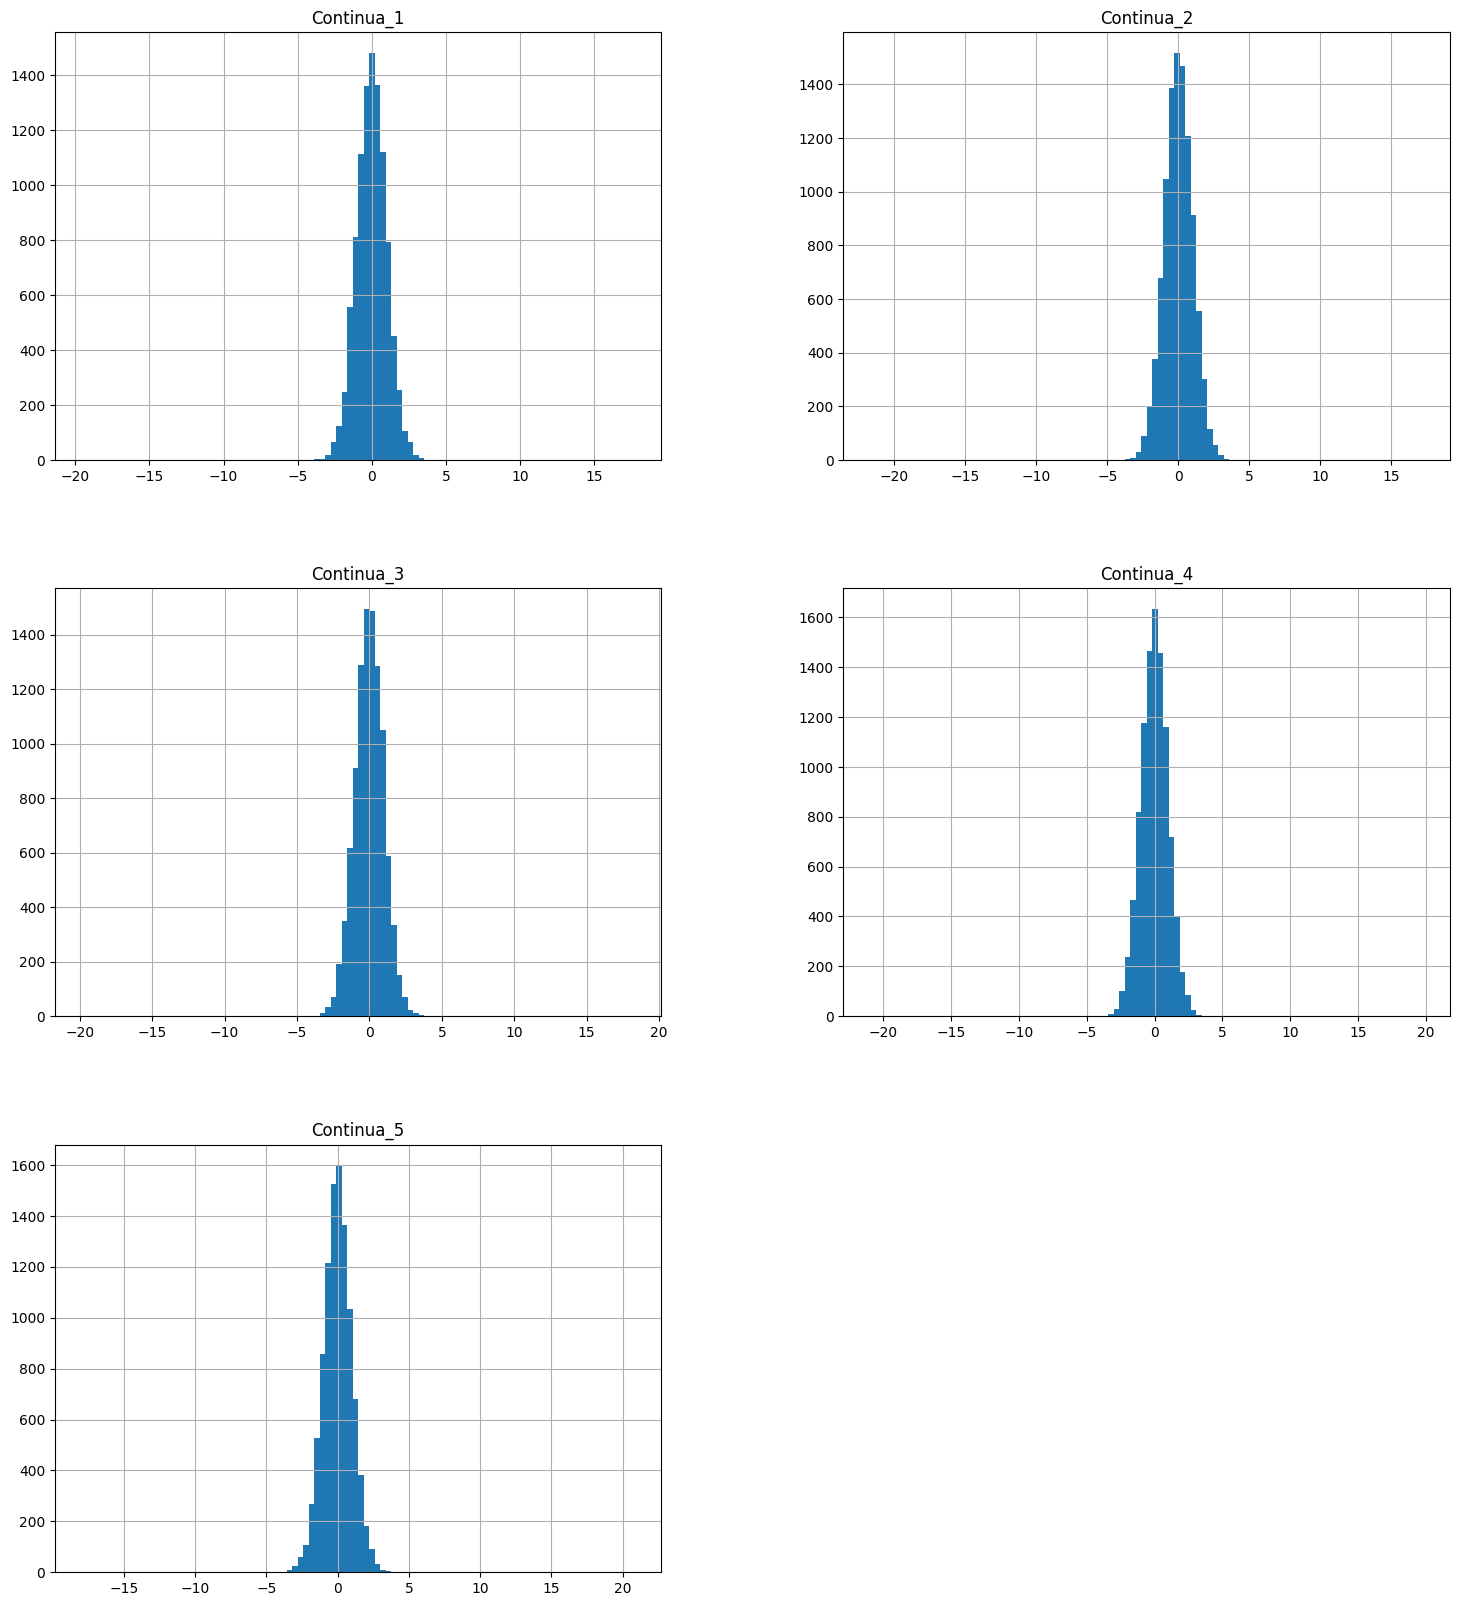

In [ ]:
#acá para ver la normal
df2.hist(bins=100, figsize= (18,20)) #Bins son el # de barras, fig size es el ancho por alto
#Se ven los outliers en el rango del eje x, porque hay hasya -20 y 20

### Metodos de imputacion de outliers (IQR - Interquartile Range)

#### El "método" mask Devuelve un DataFrame booleano que marca como True los valores por debajo y por encima del rango aceptable (potenciales outliers bajos y altos).
- El operador ~ en Python (cuando se usa con objetos booleanos como en pandas o NumPy) significa negación lógica o "no".

In [93]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)

IQR = Q3 - Q1 
mask_iqr = ~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1) # no sé para qué era esto
#construyendo una máscara booleana (mask_iqr) que se usa para filtrar outliers (valores atípicos) en un DataFrame (df2)



In [97]:
mask_iqr

0        True
1        True
2        True
3        True
4        True
        ...  
9995     True
9996     True
9997     True
9998    False
9999     True
Length: 10000, dtype: bool

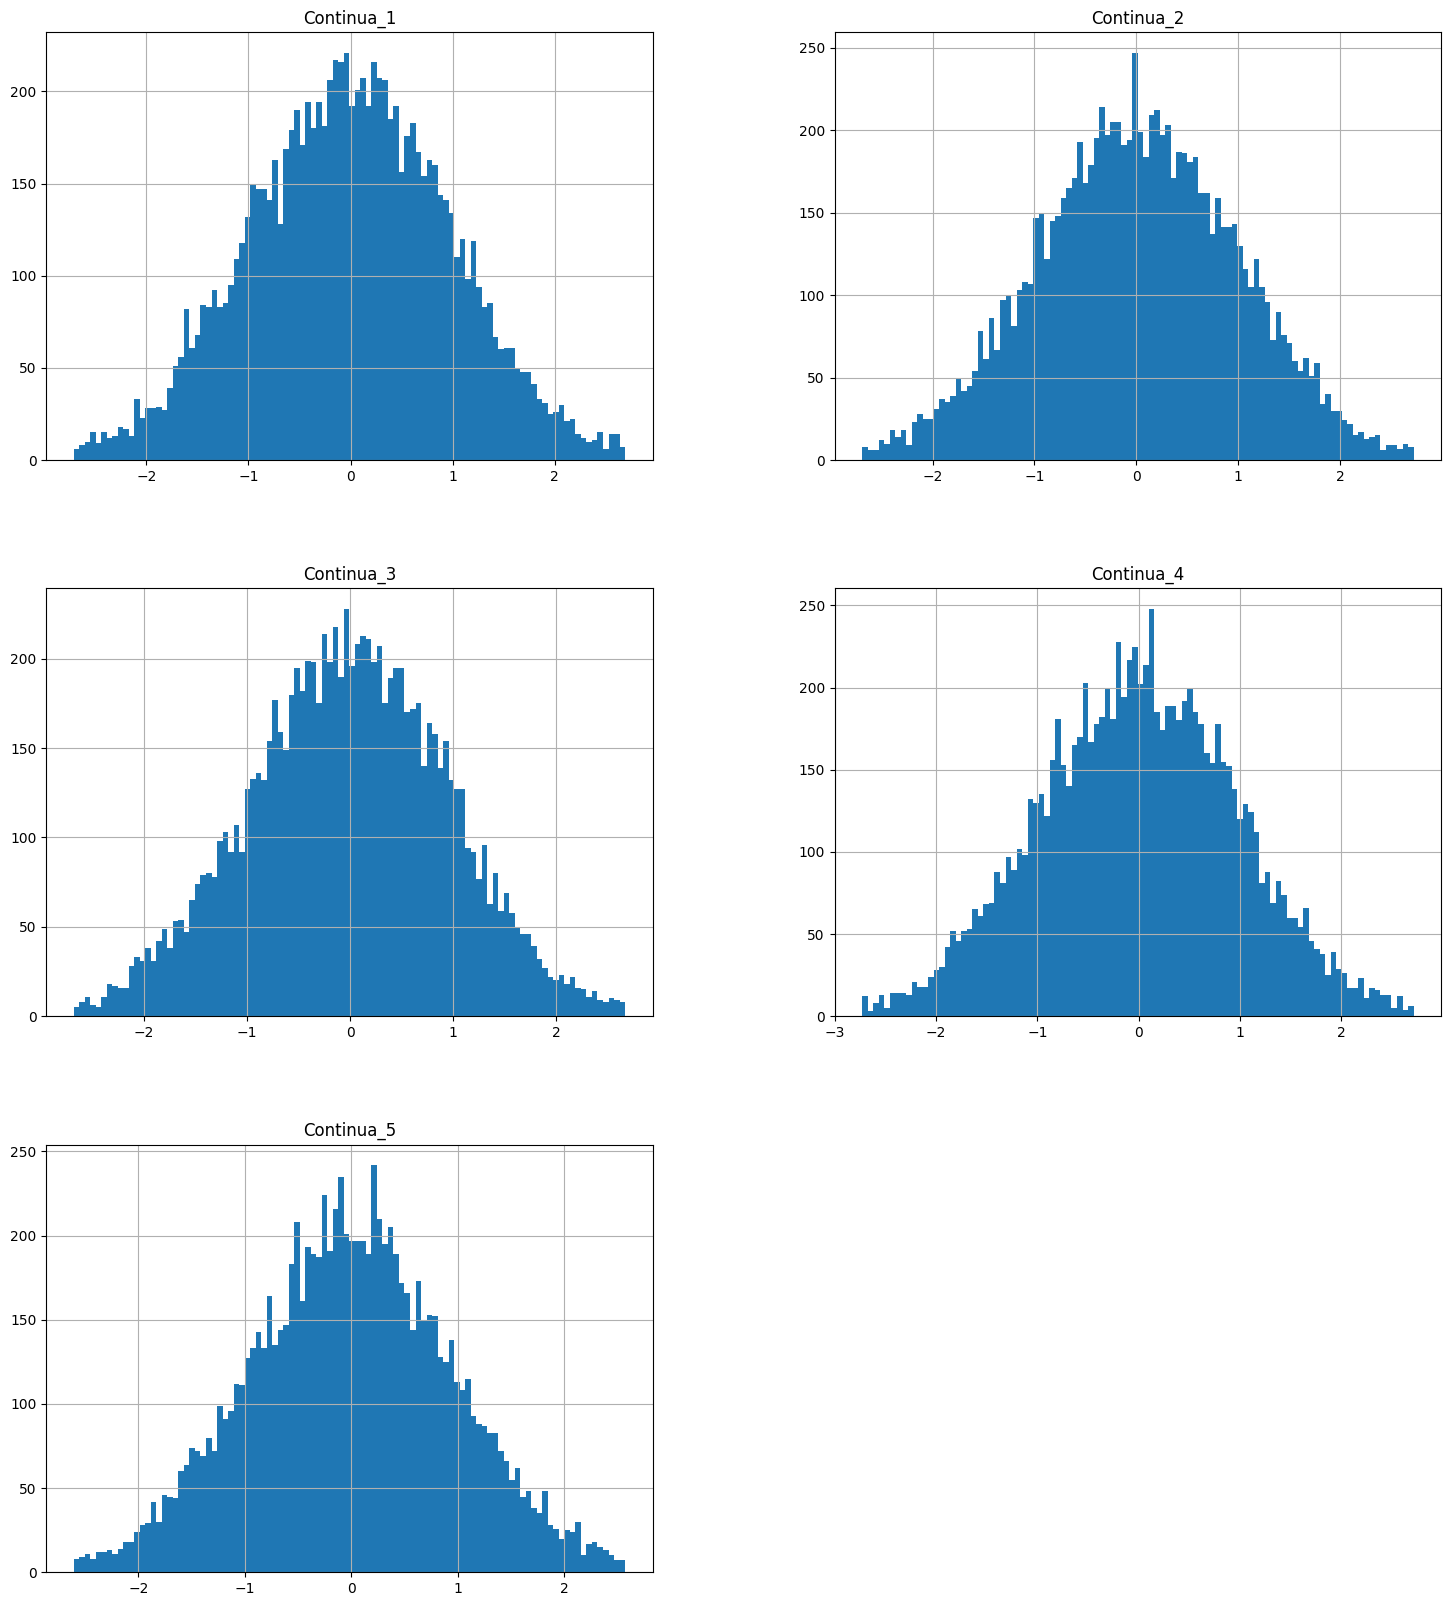

In [ ]:
df2[mask_iqr].hist(bins=100, figsize=(18,20)); # ya solo se queda los que cumplieron su condición de mask_iqr
#Acá ya no hay outliers, se ve en el rango x que va de -3 a 3

In [101]:
#acá nada más saca con qué % de la base se quedó
len(df2), len(df2[mask_iqr])

(10000, 9547)

In [100]:
len(df2) - len(df2[mask_iqr])

453

In [104]:
9547/10000*100 #95%

95.47

### Metodo de Z-score #

In [106]:
from scipy.stats import zscore

Detectar outliers: valores con z-score > 3 o < -3 suelen considerarse atípicos.

*Nota:* Esto se hace sobre datos normalziados (antes de aplicar modelos de machine learning.)



In [107]:
Z_scores = df2.apply(zscore) #Calcula los z-scores para CADA valor en el data frame normal 
#.apply aplica esa función columna por columna.
mask_zscore = (Z_scores > -3) & (Z_scores < +3)  # Hace lo mismo que arriba, marca como true los valores dentro del rango

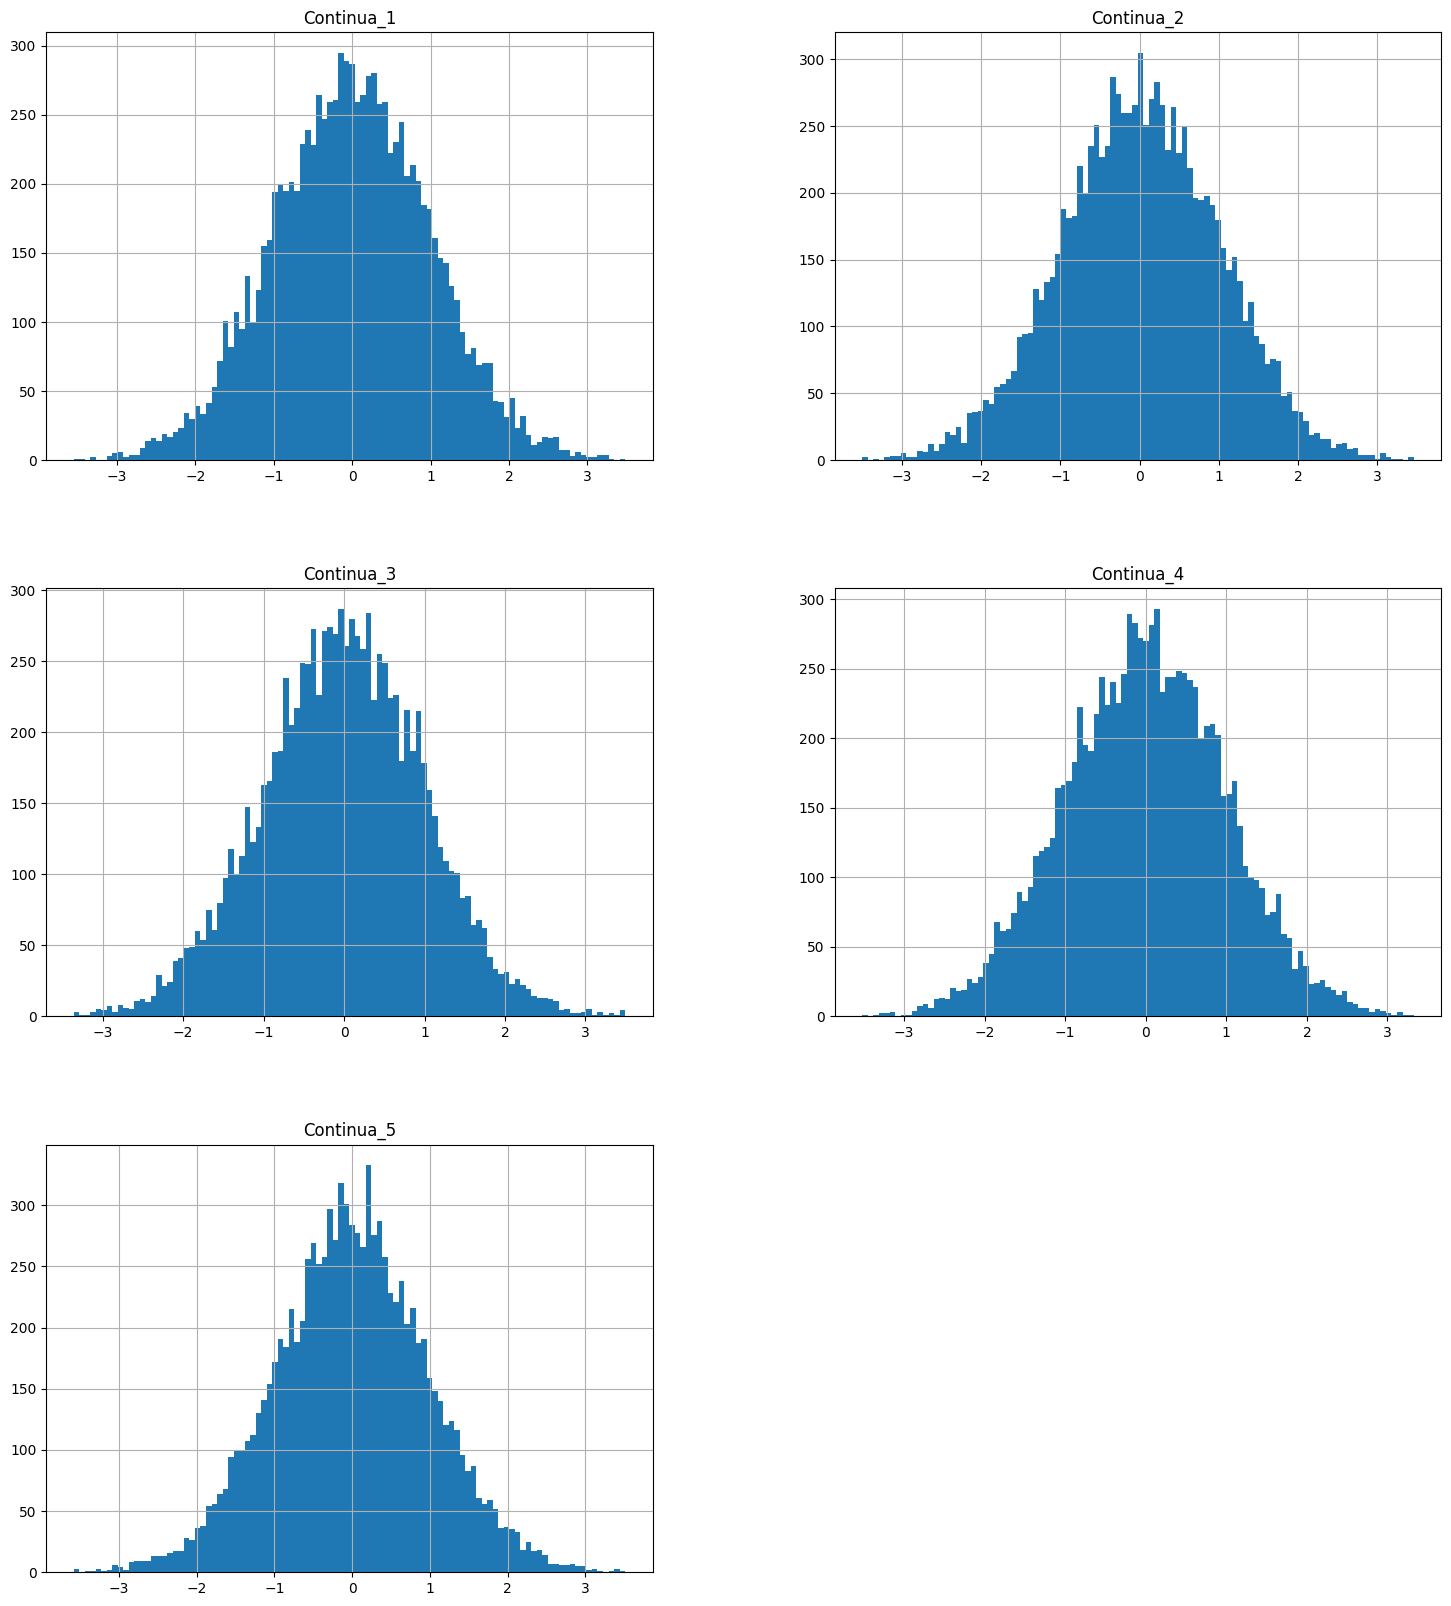

In [ ]:
df2[mask_zscore.all(axis=1)].hist(bins = 100, figsize=(18,20)); #igual se trae los valores que cumplan el rango
#el .all evalua toda la columna/fila y te da el boolean (false o true). axis=1 específica que sean filas, axis=0 se refiere a por columnas

In [112]:
len(df2), len(df2[mask_zscore.all(axis=1)])

(10000, 9884)

In [117]:
9884/10000 #nos quedamos con el 98% 

0.9884

## Multivariado

#### Isolation Forest (Tipo de arbol, familia: ensambles) Se utiliza mucho para entrendar de manera multivariada los valores extremos, en vez de ir valor por valor y hacer las técnicas

IsolationForest es un algoritmo de machine learning para detección de anomalías (outlier detection). Funciona muy bien en datos multivariantes.

In [146]:
from sklearn.ensemble import IsolationForest

In [147]:
#Dice el profe que esto ya es hacer Machine Learning. Es para ver si es un buen metodo para outliers

iso_forest = IsolationForest(n_estimators=100, random_state=42) #(N = numero de arboeles, # de ensambles, semilla random))
# .fit para entrenar el modelo

In [153]:
iso_forest.fit(df2) #acá le dio la base con los nulos segun yo

,n_estimators,100
,max_samples,'auto'
,contamination,'auto'
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


### Predicción
1 → la fila es normal (no es outlier)

-1 → la fila es anómala (outlier)

In [158]:
iso_preds = iso_forest.predict(df2)
iso_preds

array([-1,  1,  1, ...,  1, -1,  1], shape=(10000,))

In [150]:
pd.Series(iso_preds).unique() #.series convierte el array a series de pandas 
#iso_preds
#pd.Series(iso_preds)

array([-1,  1])

In [151]:
len(df2), len(df2[iso_preds==1]) #Esta predicción solo conserva como "1" al 93%

(10000, 9377)

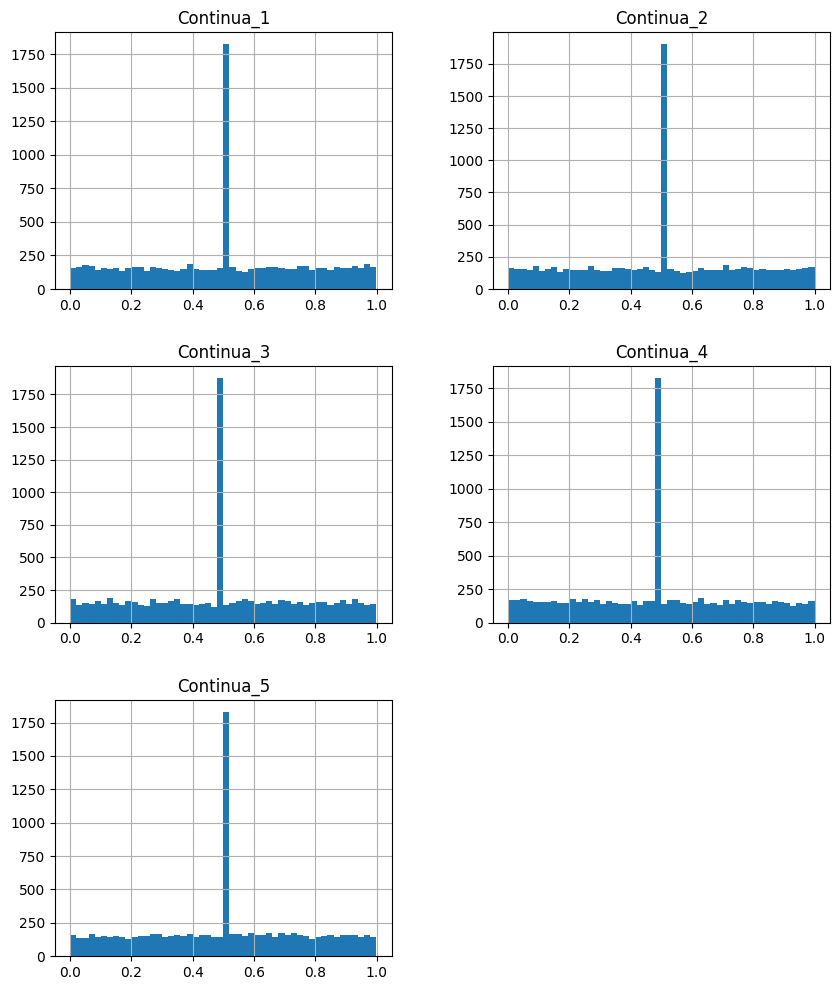

In [157]:
#grafiquemoslos
df[iso_preds==1].hist(bins=50, figsize = (10,12)) #Acá está raro que estén los outliers claritos ahí, no los etiquetó bien :v pero está el codigo igual

#df2[mask_zscore.all(axis=1)].hist(bins = 100, figsize=(18,20));

#### Y luego hace lo mismo que hicimos con el univariado. El isolation forest solo se queda con el 86% de información. Está medio feo
- Y luego cuando las plotteo, se ven bien feas hahaha
- La formula multivariada no jalo :(

Y acá usa el DBSCAN

In [160]:
#Ahora con otro modelo
from sklearn.cluster import DBSCAN #Density-Based Spatial Clustering of Applications with Noise
#A diferencia de otros algoritmos de clustering como K-means, DBSCAN no requiere especificar el número de clusters de antemano 
# y puede manejar clusters de formas irregulares y detectar ruido (outliers). 

In [161]:
dbscan = DBSCAN(min_samples=5)  #(# de clusters, )
#el metodo de la sinergia es el que te dice el numero optimo de clusters, asumamos que lo hicimos y fueron 5

#### Hay 2 formas de entrenar
- Fit y predict (por separad) - Sugerido
- fit_predict (en uno solo)

In [163]:
clusters = dbscan.fit_predict(df2)
clusters

array([-1,  0, -1, ..., -1, -1, -1], shape=(10000,))

In [166]:
pd.Series(clusters).unique(), len(pd.Series(clusters).unique()) #Cuenta cuántos clusters diferentes hay. Es decir, cuántas clases únicas existen en el array.
#no da error porque en Python, una coma entre expresiones crea una tupla.

(array([-1,  0, 51, 58, 57,  1,  2, 48, 50, 13, 63,  3, 43, 33, 12, 32,  4,
         5, 35, 45,  6, 23, 19, 10, 30, 47,  7,  8,  9, 14, 21, 37, 64, 20,
        34, 52, 11, 26, 15, 16, 17, 54, 27, 31, 41, 42, 18, 25, 29, 22, 49,
        24, 38, 28, 59, 55, 56, 36, 53, 62, 46, 60, 39, 40, 66, 68, 65, 44,
        61, 69, 70, 67]),
 72)

✅ ¿Qué es una tupla?
Una tupla es una colección ordenada de elementos que:

- Puede contener distintos tipos de datos (números, strings, listas, etc.)

- Es inmutable: una vez creada, no se puede modificar

* Se define con paréntesis (), o incluso sin paréntesis, usando comas

In [ ]:
pd.Series(clusters).value_counts(True).sort_values(ascending=False) #acá ordena y cuenta los trues para cada grupo?

#a mín me salieron 53% en el -1, y 42% en el 0. Algo ando haciendo mal.

-1     0.5381
 0     0.4220
 3     0.0027
 2     0.0011
 11    0.0011
        ...  
 38    0.0003
 49    0.0003
 70    0.0003
 40    0.0002
 8     0.0002
Name: proportion, Length: 72, dtype: float64

In [173]:
#Y entonces se trae lo del cluster mayor, en su ejemplo era 0
len(df2), len(df2[clusters == 0]) #igual ahorita SOLO me estoy trayendo el 42%

(10000, 4220)

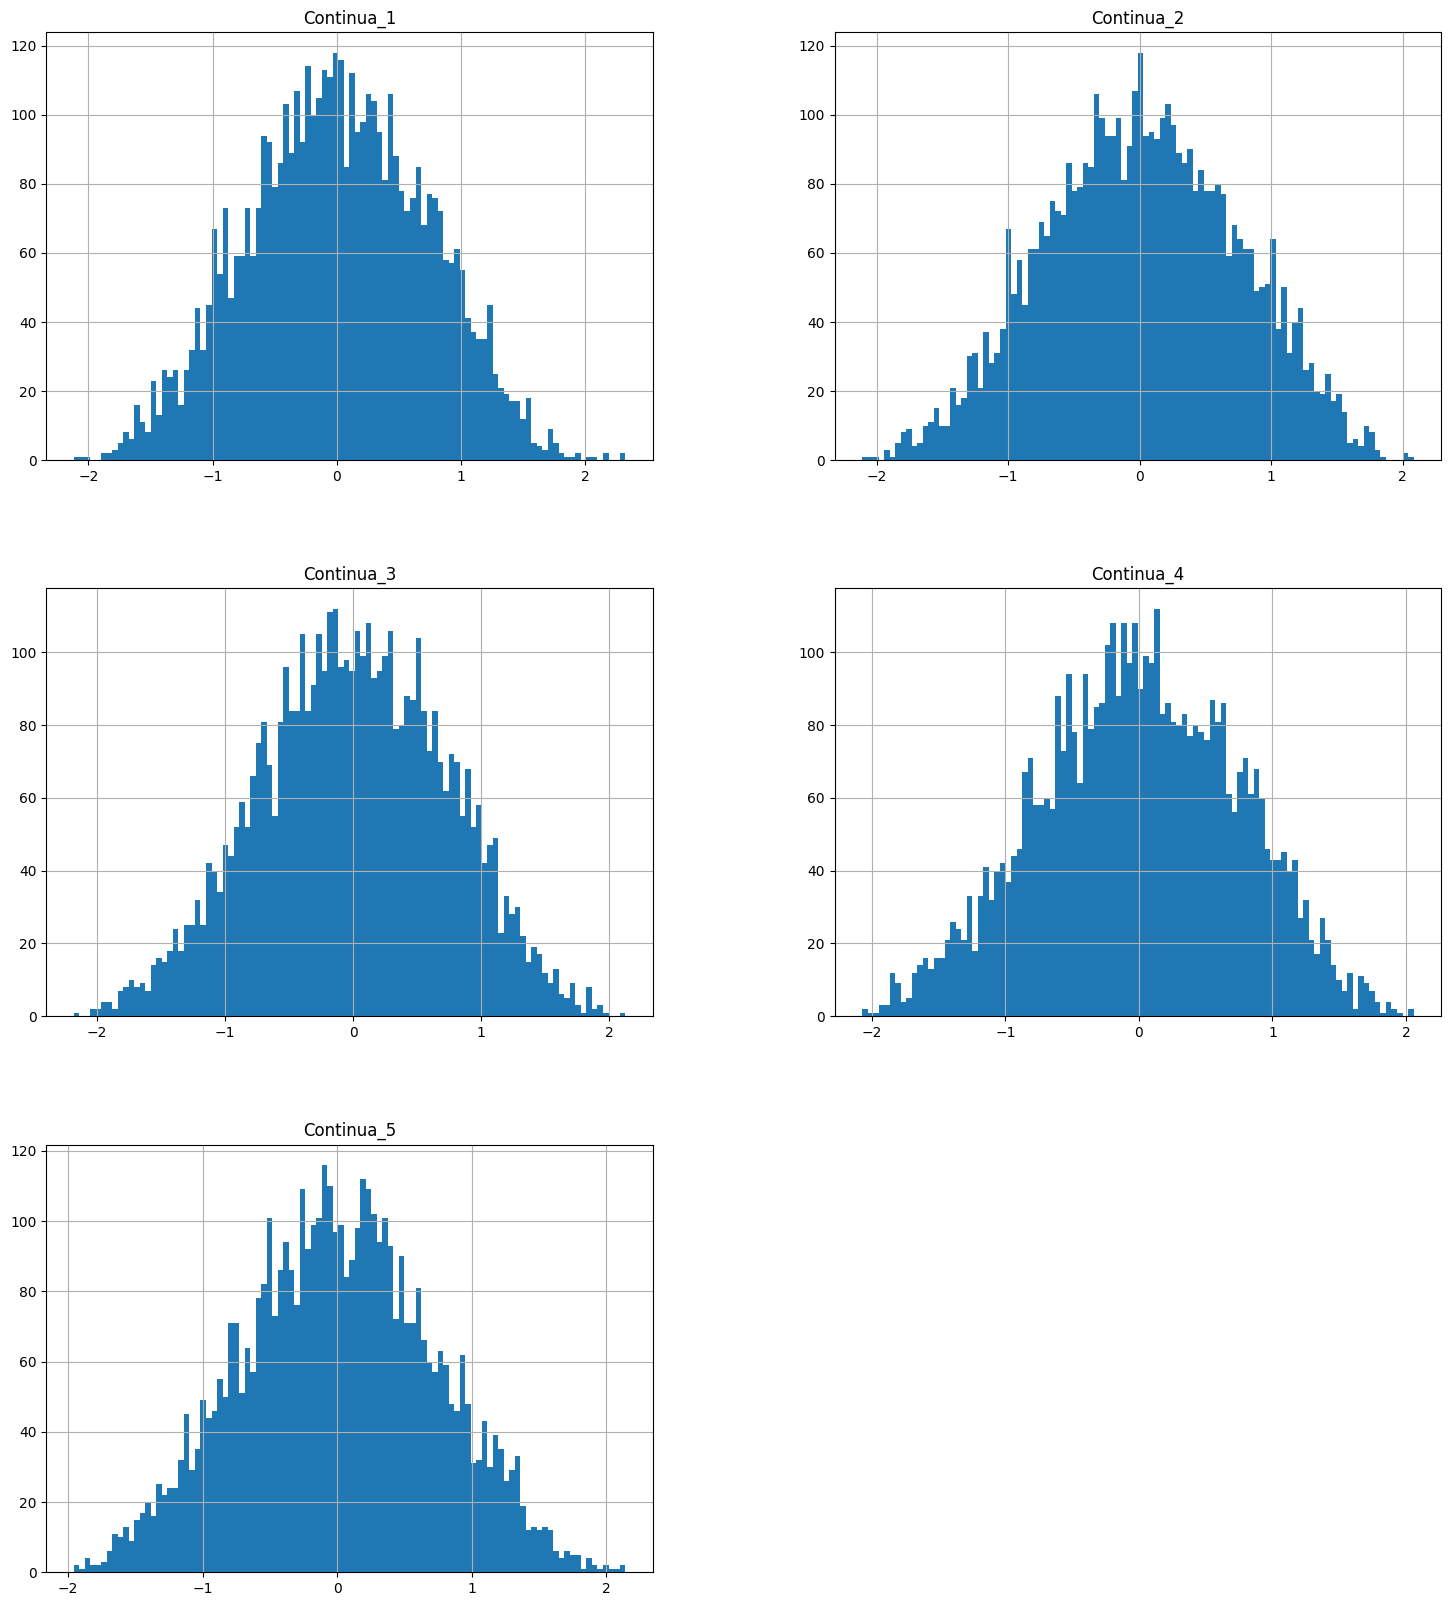

In [178]:
df2[clusters >= 0].hist(bins= 100, figsize=(18,20)); #Se trae los clusters de 0 para arriba, pero hay que ver mis datos

### El que hizo con clusters tampoco rifo jaja, pero quien sabe por que. Checho el resultado (la tabla) y dijo que era pura bsaura 
- Dijo que menos de 10 columnas, no recomienda tecnicas multivariadas (para +50 sí)

In [179]:
df2[clusters >= 0] # esta tabla

,Continua_1,Continua_2,Continua_3,Continua_4,Continua_5
1,-0.977278,0.950088,-0.151357,-0.103219,0.410599
7,0.156349,1.230291,1.202380,-0.387327,-0.302303
9,-0.438074,-1.252795,0.777490,-1.613898,-0.212740
10,-0.895467,0.386902,-0.510805,-1.180632,-0.028182
11,0.428332,0.066517,0.302472,-0.634322,-0.362741
...,...,...,...,...,...
9982,-0.863138,0.994028,0.082846,0.692740,-0.555539
9984,-0.307125,-0.425105,0.473620,1.484745,0.787622
9991,-0.773991,0.275747,1.018615,0.355303,0.099419
9995,-0.393226,-0.035262,0.586450,-0.529516,0.685231
